In [46]:
import supy as sp
import pandas as pd
import numpy as np

path_runcontrol_estm = "./RunControl.nml"

df_state_init_estm = sp.init_supy(path_runcontrol_estm)
df_state_init_estm["k_surf"] = 1.0

df_forcing = sp.util.read_forcing("./Input/Saeve_asphalt_2004_data_60.txt", tstep_mod=300)


2023-05-16 23:32:27,721 - SuPy - INFO - All cache cleared.


In [47]:
df_state_init_estm["tin_surf"] = -5.0

In [48]:
df_state_init_estm["dz_surf"] = df_state_init_estm["dz_surf"] * 0.5

In [49]:
df_state_init_estm.filter(like="dz_surf")

var     dz_surf                                                          \
ind_dim  (0, 0) (0, 1) (0, 2) (0, 3) (0, 4) (1, 0) (1, 1) (1, 2) (1, 3)   
grid                                                                      
1           0.1  0.075  0.005  0.005  0.005    0.1   0.05   0.05   0.25   

var             ...                                                          \
ind_dim (1, 4)  ... (5, 0) (5, 1) (5, 2) (5, 3) (5, 4) (6, 0) (6, 1) (6, 2)   
grid            ...                                                           
1          0.8  ...    0.1  0.025   0.05   0.05    1.1    0.1  0.025   0.05   

var                    
ind_dim (6, 3) (6, 4)  
grid                   
1         0.05    1.1  

[1 rows x 35 columns]

In [50]:
Ts_paved_list = []
Qs_list = []
QhQs_list = []
QnQs_list = []
for cp in [0.5, 1.0, 2.0, 4.0, 8.0, 16.0]:
    df_state_init_estm["cp_surf"] = cp * 1e6
    df_output, df_state_final = sp.run_supy(df_forcing, df_state_init_estm, save_state=False)

    Ts_paved = df_output.loc[1, "debug"]["Tsfc_Paved"].resample("h").mean()
    Qs = df_output.loc[1, "debug"]["QS_Paved"].resample("h").mean()
    Qh = df_output.loc[1, "debug"]["QH_Paved"].resample("h").mean()
    Qn = df_output.loc[1, "debug"]["QN_Paved"].resample("h").mean()
    
    Ts_paved_list.append(Ts_paved)
    Qs_list.append(Qs)
    QhQs_list.append(Qh / Qs)
    QnQs_list.append(Qn / Qs)

2023-05-16 23:32:29,903 - SuPy - INFO - ====================
2023-05-16 23:32:29,905 - SuPy - INFO - Simulation period:
2023-05-16 23:32:29,908 - SuPy - INFO -   Start: 2004-02-12 00:05:00
2023-05-16 23:32:29,910 - SuPy - INFO -   End: 2004-04-14 21:00:00
2023-05-16 23:32:29,911 - SuPy - INFO - 
2023-05-16 23:32:29,912 - SuPy - INFO - No. of grids: 1
2023-05-16 23:32:29,914 - SuPy - INFO - SuPy is running in serial mode
2023-05-16 23:32:35,982 - SuPy - INFO - Execution time: 6.1 s
2023-05-16 23:32:35,983 - SuPy - INFO - ====================

2023-05-16 23:32:36,016 - SuPy - INFO - ====================
2023-05-16 23:32:36,017 - SuPy - INFO - Simulation period:
2023-05-16 23:32:36,019 - SuPy - INFO -   Start: 2004-02-12 00:05:00
2023-05-16 23:32:36,020 - SuPy - INFO -   End: 2004-04-14 21:00:00
2023-05-16 23:32:36,021 - SuPy - INFO - 
2023-05-16 23:32:36,022 - SuPy - INFO - No. of grids: 1
2023-05-16 23:32:36,023 - SuPy - INFO - SuPy is running in serial mode
2023-05-16 23:32:40,505 - Su

In [51]:
Ts_paved_df = pd.concat(Ts_paved_list, axis=1)
Qs_df = pd.concat(Qs_list, axis=1)
QhQs_df = pd.concat(QhQs_list, axis=1)
QnQs_df = pd.concat(QnQs_list, axis=1)

Ts_paved_df.columns = ["Cp=$0.5\\times10^6$", "Cp=$1.0\\times10^6$", "Cp=$2.0\\times10^6$", "Cp=$4.0\\times10^6$", "Cp=$8.0\\times10^6$", "Cp=$16.0\\times10^6$"]
Qs_df.columns = ["Cp=$0.5\\times10^6$", "Cp=$1.0\\times10^6$", "Cp=$2.0\\times10^6$", "Cp=$4.0\\times10^6$", "Cp=$8.0\\times10^6$", "Cp=$16.0\\times10^6$"]
QhQs_df.columns = ["Cp=$0.5\\times10^6$", "Cp=$1.0\\times10^6$", "Cp=$2.0\\times10^6$", "Cp=$4.0\\times10^6$", "Cp=$8.0\\times10^6$", "Cp=$16.0\\times10^6$"]
QnQs_df.columns = ["Cp=$0.5\\times10^6$", "Cp=$1.0\\times10^6$", "Cp=$2.0\\times10^6$", "Cp=$4.0\\times10^6$", "Cp=$8.0\\times10^6$", "Cp=$16.0\\times10^6$"]

<Axes: xlabel='datetime', ylabel='Qn/Qs'>

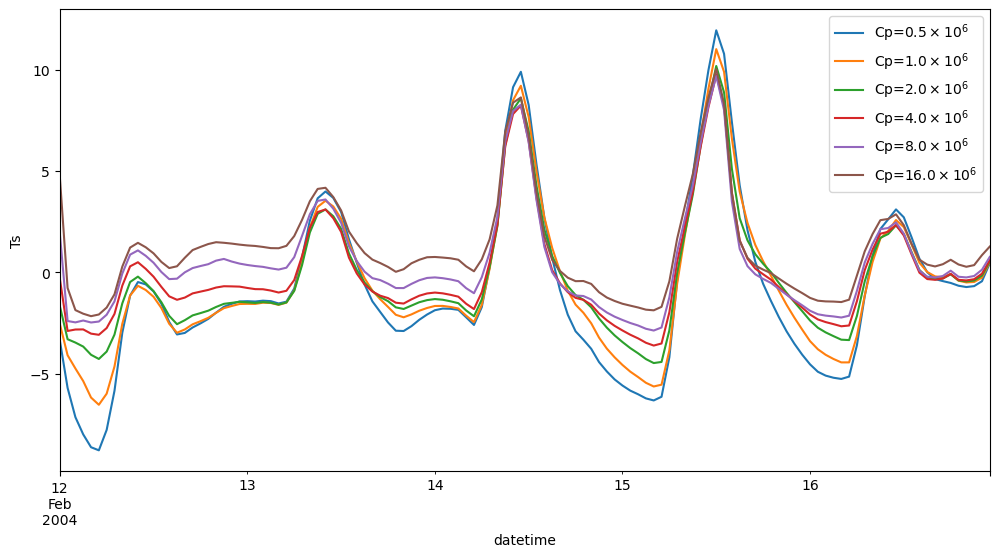

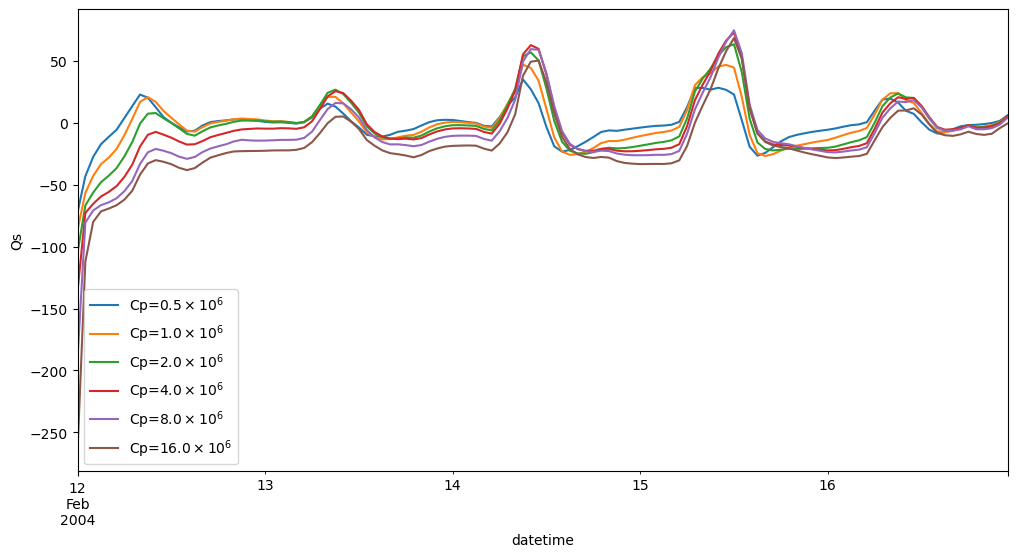

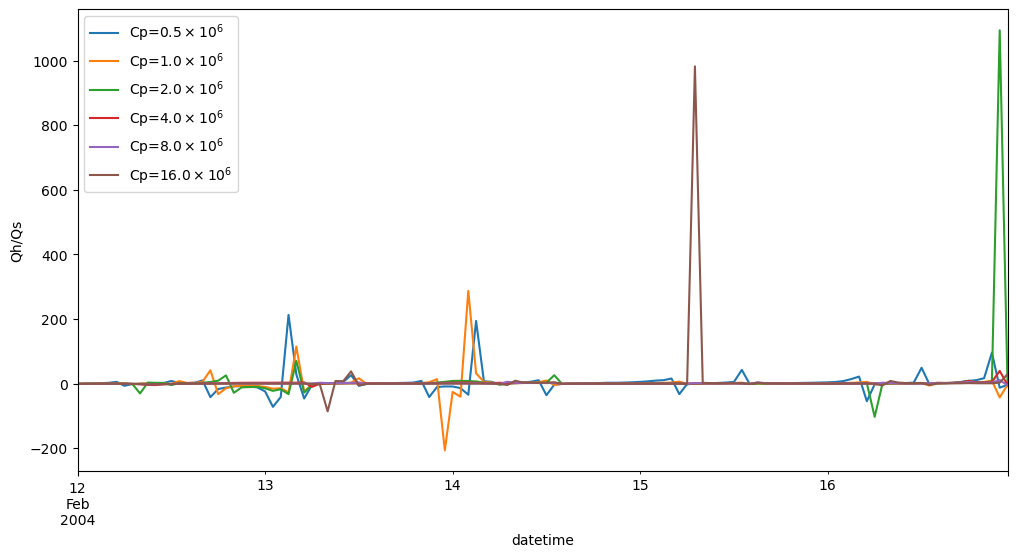

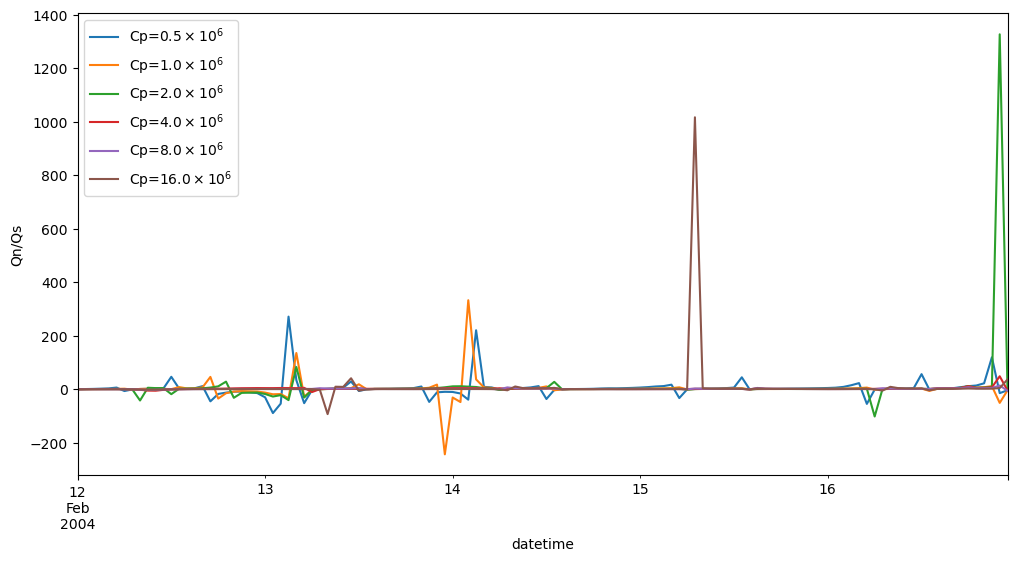

In [52]:
Ts_paved_df.iloc[0:120].plot(figsize=(12, 6), ylabel="Ts")
Qs_df.iloc[0:120].plot(figsize=(12, 6), ylabel="Qs")
QhQs_df.iloc[0:120].plot(figsize=(12, 6), ylabel="Qh/Qs")
QnQs_df.iloc[0:120].plot(figsize=(12, 6), ylabel="Qn/Qs")

(<Figure size 640x480 with 1 Axes>, <Axes: >)

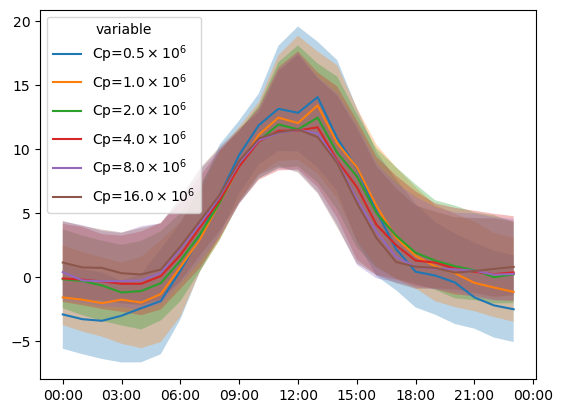

In [53]:
sp.util.plot_day_clm(Ts_paved_df)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

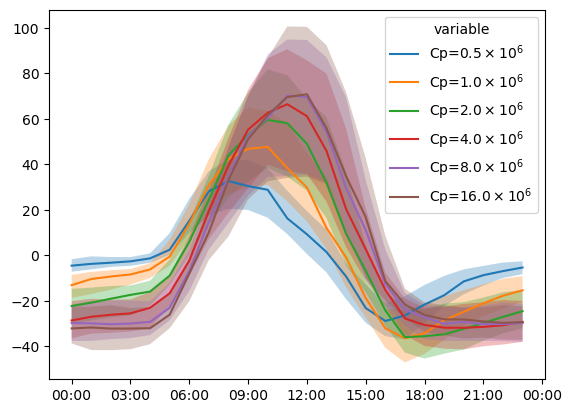

In [54]:
sp.util.plot_day_clm(Qs_df)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

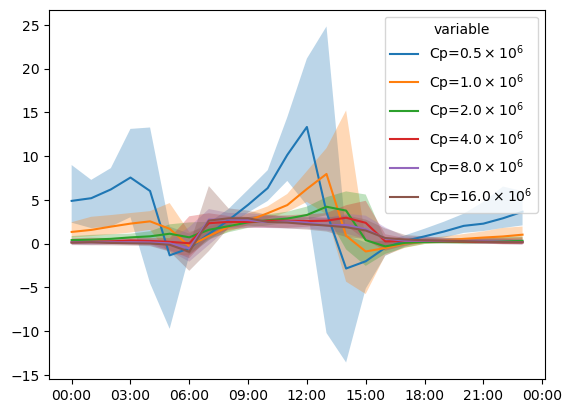

In [55]:
sp.util.plot_day_clm(QhQs_df)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

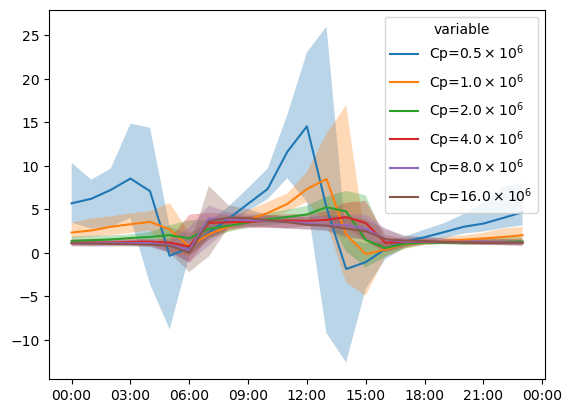

In [56]:
sp.util.plot_day_clm(QnQs_df)